# Spike Gadgets Ephys and Video Syncing

# TODO

- [] Refactor the trodes extraction functions

In [1]:
import os
import re
import sys
from collections import defaultdict
import random
from random import randrange
import glob

In [2]:
import numpy as np
import cv2
from IPython.display import Video
import matplotlib.pyplot as plt

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
import trodes.read_exported

In [5]:
%matplotlib inline

# Part 1: Inputting Data

## Name of protocol for naming

- This name will be used to name files and title plots. Please change if you are using a different protocol or adding more details
    - **NOTE**: This should be changed based on the name the protocol

In [6]:
protocol_name = "tethered_with_medpc"

## Getting the file name of the raw data

- Default input folder and keyword to search the files for 
    - **NOTE**: This should not be changed unless there is a consistent change with the file naming convention

In [7]:
input_folder = "./data"

In [8]:
# Accomodates for both capitalization of the file names
raw_data_file_keyword = '*[mM]edpc*'

- Asking the user what the path to the recording files are, with the option of using wildcards

- Make this cell into non-code block if you are using the same file path for multiple runs

In [9]:
raw_data_glob_pattern = "./data/mice_with_tethered_with_medpc_20220907_140232.rec"

- By default, this will search for files that are in the `./data` folder (in the folder that this notebook is in) that have key word you specified in the file name

In [10]:
# Using the user inputted path/pattern
if raw_data_glob_pattern.strip():
    # Getting a list of all matching files
    raw_data_files_list = glob.glob(raw_data_glob_pattern.strip())
    # Checking if there were any files that matched
    if raw_data_files_list:
        raw_data_file_path = raw_data_files_list[0]
    else:
        raise ValueError("No files were found with the path/pattern of {}. Please rerun the previous cell with the correct path".format(raw_data_glob_pattern))

# Using the default pattern
else:
    # Searching for matching files with recursion
    if glob.glob(os.path.join(input_folder + "**", raw_data_file_keyword)):
        raw_data_glob_pattern = os.path.join(input_folder + "**", raw_data_file_keyword)
        # Getting a list of all matching files
        raw_data_files_list = glob.glob(raw_data_glob_pattern)
    # Searching for matching files only in the specified folder
    elif glob.glob(os.path.join(input_folder, raw_data_file_keyword)):
        raw_data_glob_pattern = glob.glob(os.path.join(input_folder, raw_data_file_keyword))
        # Getting a list of all matching files
        raw_data_files_list = glob.glob(raw_data_glob_pattern)
    else:
        raise ValueError("No files were found in {} that had the keyword {} in it".format(input_folder, raw_data_file_keyword))


- Checking to see if only one file is specified

In [11]:
if len(raw_data_files_list) >= 2:
    raise ValueError("More than one file was found with the path/pattern of {}. Please rerun the previous cell with the correct path".format(raw_data_glob_pattern))
else:
    # Using the first(and only file) as the file path
    raw_data_file_path = raw_data_files_list[0]

In [12]:
raw_data_file_path

'./data/mice_with_tethered_with_medpc_20220907_140232.rec'

## Extracting the data and the metadata from the Recording folder

- Creating a dictionary that has the directory as the key and a dictionary that has the file name as the key and the 

In [13]:
file_to_data = trodes.read_exported.get_all_trodes_data_from_directory("./data/mice_with_tethered_with_medpc_20220907_140232.rec")

/nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/../../src/trodes/read_exported.py:70: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(typearr)
/nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/../../src/trodes/read_exported.py:138: UserWarning: Can not process /nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/data/mice_with_tethered_with_medpc_20220907_140232.rec/20220907_140232test.1.mp4
  warnings.warn("Can not process {}".format(absolute_file_path))
/nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/../../src/trodes/read_exported.py:138: UserWarning: Can not process /nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/data/mice_with_tethered_with_medpc_20220907_140232.rec/20220907_140232t

file prefix: timestamps.dat
directory prefix: spikeband
file prefix: spikeband_nt2ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt27ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt15ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt14ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt19ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt31ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt6ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt24ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt32ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt25ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt5ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt20ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt13ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt26ch1.dat
directory prefix: spikeband
file prefix: spikeband_nt21ch1.dat
directory prefix: spikeband
fi

/nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/../../src/trodes/read_exported.py:138: UserWarning: Can not process /nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/data/mice_with_tethered_with_medpc_20220907_140232.rec/20220907_140232test.mountainsort/20220907_140232test.timestamps.mda
  warnings.warn("Can not process {}".format(absolute_file_path))
/nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/../../src/trodes/read_exported.py:138: UserWarning: Can not process /nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/data/mice_with_tethered_with_medpc_20220907_140232.rec/20220907_140232test.mountainsort/20220907_140232test.group0.mda
  warnings.warn("Can not process {}".format(absolute_file_path))
/nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/../../src/trodes/read_exported.py:138: UserWarning: Can not process /nan

# TODO: Try to make a Pandas Dataframe out of timestamp infor

- All the folders that were extracted from

In [14]:
file_to_data.keys()

dict_keys(['20220907_140232test.spikeband', 'spikeband', '20220907_140232test.DIO', 'DIO', '.', '20220907_140232test.raw', 'raw', '20220907_140232test.analog', 'analog', '20220907_140232test.spikes', 'spikes', '20220907_140232test.mountainsort', 'mountainsort', '20220907_140232test.kilosort', 'kilosort', '20220907_140232test.stimulation', 'stimulation', '20220907_140232test.LFP', 'LFP'])

In [15]:
file_to_data["."]

{'1.videoTimeStamps.cameraHWSync': {'clock rate': '30000',
  'fields': '<PosTimestamp uint32><HWframeCount uint32><HWTimestamp uint64>',
  'data': array([(39104810, 30742, 0), (39106160, 30743, 0), (39107726, 30744, 0),
         ..., (45870150, 35244, 0), (45871601, 35245, 0),
         (45872946, 35246, 0)],
        dtype=[('PosTimestamp', '<u4'), ('HWframeCount', '<u4'), ('HWTimestamp', '<u8')]),
  'absolute_file_path': '/nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/data/mice_with_tethered_with_medpc_20220907_140232.rec/20220907_140232test.1.videoTimeStamps.cameraHWSync'}}

In [16]:
file_to_data["20220907_140232test.spikeband"]

{'timestamps.dat': {'description': 'Spike band timestamps',
  'byte_order': 'little endian',
  'original_file': '20220907_140232test.rec',
  'clockrate': '20000',
  'trodes_version': '2.2.3',
  'compile_date': 'Sep 16 2021',
  'compile_time': '10:58:00',
  'qt_version': '5.15.1',
  'commit_tag': 'heads/Release_2.2.3-0-gc9f03c90',
  'controller_firmware': '3.17',
  'headstage_firmware': '2.3',
  'controller_serialnum': '00104 00176',
  'headstage_serialnum': '00801 00111',
  'autosettle': '0',
  'smartref': '0',
  'gyro': '0',
  'accelerometer': '0',
  'magnetometer': '0',
  'time_offset': '0',
  'system_time_at_creation': '1662573758590',
  'timestamp_at_creation': '39059387',
  'first_timestamp': '39104773',
  'fields': '<time uint32>',
  'data': array([(39104773,), (39104774,), (39104775,), ..., (45873337,),
         (45873338,), (45873339,)], dtype=[('time', '<u4')]),
  'absolute_file_path': '/nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/data/mi

- Looking over all the extracted data

In [17]:
for key, value in file_to_data.items():
    print("Directory: {}".format(key))
    for file_name, trodes_dict in value.items():
        print("\tFile Name: {}".format(file_name))
        for data_type, data_value in trodes_dict.items():
            print("\n \t \t Trodes Data Type: {}".format(data_type))
            print("\t \t Python Type: {}".format(type(data_value)))
            print("\t \t Data Value: {}".format(data_value))

Directory: 20220907_140232test.spikeband
	File Name: timestamps.dat

 	 	 Trodes Data Type: description
	 	 Python Type: <class 'str'>
	 	 Data Value: Spike band timestamps

 	 	 Trodes Data Type: byte_order
	 	 Python Type: <class 'str'>
	 	 Data Value: little endian

 	 	 Trodes Data Type: original_file
	 	 Python Type: <class 'str'>
	 	 Data Value: 20220907_140232test.rec

 	 	 Trodes Data Type: clockrate
	 	 Python Type: <class 'str'>
	 	 Data Value: 20000

 	 	 Trodes Data Type: trodes_version
	 	 Python Type: <class 'str'>
	 	 Data Value: 2.2.3

 	 	 Trodes Data Type: compile_date
	 	 Python Type: <class 'str'>
	 	 Data Value: Sep 16 2021

 	 	 Trodes Data Type: compile_time
	 	 Python Type: <class 'str'>
	 	 Data Value: 10:58:00

 	 	 Trodes Data Type: qt_version
	 	 Python Type: <class 'str'>
	 	 Data Value: 5.15.1

 	 	 Trodes Data Type: commit_tag
	 	 Python Type: <class 'str'>
	 	 Data Value: heads/Release_2.2.3-0-gc9f03c90

 	 	 Trodes Data Type: controller_firmware
	 	 Pyt

# Part 2: Looking over the data

## Looking over the ephys recording

- Getting the name of the ephys recording direcotry

In [18]:
raw_directory_dict = file_to_data["raw"]

- Getting the name of the files in the ephys recording directory

In [19]:
raw_directory_dict.keys()

dict_keys(['timestamps.dat', 'raw_group0.dat', 'group0.coordinates.dat'])

In [20]:
raw_recording_fields_text = raw_directory_dict["raw_group0.dat"]

In [21]:
raw_recording_fields_text

{'description': 'Raw (unfiltered) data for one sorting group',
 'byte_order': 'little endian',
 'original_file': '20220907_140232test.rec',
 'clockrate': '20000',
 'trodes_version': '2.2.3',
 'compile_date': 'Sep 16 2021',
 'compile_time': '10:58:00',
 'qt_version': '5.15.1',
 'commit_tag': 'heads/Release_2.2.3-0-gc9f03c90',
 'controller_firmware': '3.17',
 'headstage_firmware': '2.3',
 'controller_serialnum': '00104 00176',
 'headstage_serialnum': '00801 00111',
 'autosettle': '0',
 'smartref': '0',
 'gyro': '0',
 'accelerometer': '0',
 'magnetometer': '0',
 'time_offset': '0',
 'system_time_at_creation': '1662573758590',
 'timestamp_at_creation': '39059387',
 'first_timestamp': '39104773',
 'sorting_group': '0',
 'num_channels': '32',
 'voltage_scaling': '0.195',
 'fields': '<voltage 32*int16>',
 'data': array([([ -1084,   -723,   -380,   -972,   -469,  -1199,   -671,   -491,    -24,  -3433,  -2578,  -2087,   -239,    184,    814,   -516,   -970,   -770,    163,   -114,     37,  -337

- Array of Voltages for each channel

In [22]:
voltage_value_array = raw_recording_fields_text["data"]

In [23]:
voltage_value_array.shape

(6768567,)

In [24]:
voltage_value_array[:5]

array([([-1084,  -723,  -380,  -972,  -469, -1199,  -671,  -491,   -24, -3433, -2578, -2087,  -239,   184,   814,  -516,  -970,  -770,   163,  -114,    37, -3377,  -560,   -84,  -411, -3802, -3509, -3242, -2075,  -365,  -525, -1193],),
       ([-1007,  -754,  -376, -1010,  -538, -1231,  -658,  -375,   -81, -3450, -2511, -2036,  -197,   184,   798,  -430, -1001,  -790,   114,   -18,    59, -3321,  -587,  -161,  -280, -3843, -3478, -3174, -2050,  -370,  -493, -1179],),
       ([ -986,  -687,  -381, -1062,  -506, -1231,  -644,  -403,   -30, -3431, -2575, -2068,  -128,   185,   773,  -430,  -970,  -781,   -12,   -72,    47, -3259,  -635,  -206,  -241, -3756, -3493, -3180, -2116,  -361,  -554, -1129],),
       ([-1003,  -719,  -381, -1107,  -400, -1260,  -647,  -404,    17, -3392, -2626, -2089,  -261,   211,   748,  -430,  -944,  -737,    13,  -109,    15, -3216,  -571,  -115,  -367, -3800, -3463, -3239, -2116,  -462,  -511, -1098],),
       ([-1051,  -729,  -381, -1105,  -447, -1273,  -632

- Voltage Time Stamps

In [25]:
raw_directory_dict.keys()

dict_keys(['timestamps.dat', 'raw_group0.dat', 'group0.coordinates.dat'])

In [26]:
voltage_timestamp_array = raw_directory_dict["timestamps.dat"]["data"]

In [27]:
voltage_timestamp_array[:5]

array([(39104773,), (39104774,), (39104775,), (39104776,), (39104777,)],
      dtype=[('time', '<u4')])

In [28]:
voltage_timestamp_array[-5:]

array([(45873335,), (45873336,), (45873337,), (45873338,), (45873339,)],
      dtype=[('time', '<u4')])

In [29]:
voltage_timestamp_array.shape

(6768567,)

- Converting the array to integers to be able to do calculations

    - u4 and i2 explanation: https://www.geeksforgeeks.org/data-type-object-dtype-numpy-python/

In [30]:
voltage_timestamp_array = voltage_timestamp_array.astype(int)

In [31]:
voltage_timestamp_array[:5]

array([39104773, 39104774, 39104775, 39104776, 39104777])

In [32]:
voltage_timestamp_array[-5:]

array([45873335, 45873336, 45873337, 45873338, 45873339])

In [33]:
voltage_timestamp_array.shape

(6768567,)

## Looking over the video files

In [35]:
parent_directory_dict = file_to_data["."]

In [36]:
video_time_stamp_dict = parent_directory_dict["1.videoTimeStamps.cameraHWSync"]

In [37]:
video_time_stamp_dict

{'clock rate': '30000',
 'fields': '<PosTimestamp uint32><HWframeCount uint32><HWTimestamp uint64>',
 'data': array([(39104810, 30742, 0), (39106160, 30743, 0), (39107726, 30744, 0),
        ..., (45870150, 35244, 0), (45871601, 35245, 0),
        (45872946, 35246, 0)],
       dtype=[('PosTimestamp', '<u4'), ('HWframeCount', '<u4'), ('HWTimestamp', '<u8')]),
 'absolute_file_path': '/nancy/user/riwata/projects/spike_gadgets_repo/results/2022_09_13_timestamp_syncing/data/mice_with_tethered_with_medpc_20220907_140232.rec/20220907_140232test.1.videoTimeStamps.cameraHWSync'}

In [38]:
video_time_stamp_dict["data"]

array([(39104810, 30742, 0), (39106160, 30743, 0), (39107726, 30744, 0),
       ..., (45870150, 35244, 0), (45871601, 35245, 0),
       (45872946, 35246, 0)],
      dtype=[('PosTimestamp', '<u4'), ('HWframeCount', '<u4'), ('HWTimestamp', '<u8')])

In [39]:
video_time_stamp_dict["data"].shape

(4505,)

# Part 3: Converting everything into timestamps

## Voltage to timestamp

- Use the matching index to convert between the voltage time stamp and the recording

In [40]:
random_voltage_index = np.random.choice(voltage_timestamp_array.shape[0], 1, replace=False)  

In [41]:
random_voltage_index

array([3504009])

In [42]:
voltage_value_array[random_voltage_index]

array([([-8443,  1580,   -15,   887,   449,  3105,   184,  1063,   344,  1408,  -105,  -287,   531,   996,   -34,  1177,   492,   198,    70,   832,   304,  1693,  1057,   681,   390,  4407,  9015,  9599,  4177,   653,   839,  1001],)],
      dtype=[('voltage', '<i2', (32,))])

- Getting the associated timestamp of the ephys recording

In [43]:
random_voltage_time_stamp = voltage_timestamp_array[random_voltage_index]

In [44]:
random_voltage_time_stamp

array([42608782])

## Video frame to timestamp

- Getting the time stamps of the video frames
    - Each frame would correspond to each timestamp. Because the sample rate of videos is smaller than ephys recording, the number of video time stamps will be less than that of ephys recordings.

In [45]:
video_time_stamp_array = np.array(video_time_stamp_dict["data"])

In [46]:
video_time_stamp_array

array([(39104810, 30742, 0), (39106160, 30743, 0), (39107726, 30744, 0),
       ..., (45870150, 35244, 0), (45871601, 35245, 0),
       (45872946, 35246, 0)],
      dtype=[('PosTimestamp', '<u4'), ('HWframeCount', '<u4'), ('HWTimestamp', '<u8')])

In [47]:
video_time_stamp_array.shape

(4505,)

In [48]:
random_frame = np.random.choice(video_time_stamp_array.shape[0], 1, replace=False)  

In [49]:
random_frame

array([4075])

- Getting only the first number in each tuple

In [50]:
pos_timestamp_array = np.array([x[0] for x in video_time_stamp_array]) 

In [51]:
pos_timestamp_array

array([39104810, 39106160, 39107726, ..., 45870150, 45871601, 45872946],
      dtype=uint32)

- Converting to integer to do calculations

In [52]:
pos_timestamp_array = pos_timestamp_array.astype(int)

In [53]:
pos_timestamp_array[random_frame]

array([45228305])

## Video time to Video frame

### Reading in video

In [54]:
raw_data_file_path

'./data/mice_with_tethered_with_medpc_20220907_140232.rec'

In [55]:
'./data/mice_with_tethered_with_medpc_20220907_140232.rec/20220907_140232test.'

'./data/mice_with_tethered_with_medpc_20220907_140232.rec/20220907_140232test.'

In [56]:
video_file_list = glob.glob(os.path.join(raw_data_file_path, "*.mp4"))

In [57]:
video_file_list

['./data/mice_with_tethered_with_medpc_20220907_140232.rec/20220907_140232test.1.mp4']

In [58]:
video_file_path = video_file_list[0]

In [59]:
# read video from file
cap = cv2.VideoCapture(video_file_path)

- Getting the number of frames per second

In [60]:
fps = cap.get(cv2.CAP_PROP_FPS)

In [61]:
fps

13.503005198137348

- Total number of frames

In [62]:
total_frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)

In [63]:
total_frame_count


4504.0

- Calculating the length of the video by dividing the total number of frames by the fps

In [64]:
video_length = total_frame_count / fps

In [65]:
video_length

333.5553777777778

In [66]:
random_video_time = np.random.choice(int(video_length), 1, replace=False)  

In [67]:
random_video_time

array([328])

In [68]:
random_video_frame = random_video_time * fps

In [69]:
random_video_frame

array([4428.98570499])

- And converting it back to timestamp

In [70]:
pos_timestamp_array[int(random_video_frame[0])]

45758707

# Part 4: Converting from timestamps back to everything

In [71]:
def timestamp_to_index(current_ts, ts_array):
    """
    """
    return np.argwhere(ts_array >= current_ts)[0][0]

## Time stamp to Voltage Value

In [72]:
random_voltage_time_stamp

array([42608782])

In [73]:
voltage_timestamp_array

array([39104773, 39104774, 39104775, ..., 45873337, 45873338, 45873339])

- Getting the index of the closest timestamp 

In [74]:
random_voltage_index = timestamp_to_index(current_ts=random_voltage_time_stamp, ts_array=voltage_timestamp_array)

In [75]:
random_voltage_index

3504009

- Checking if it matches to the original timestamp
    - Should be the same, because the sampling rate of the timestamps are based on the ephys recording

In [76]:
voltage_timestamp_array[random_voltage_index]

42608782

- Getting the voltage value based on the index

In [77]:
voltage_value_array[random_voltage_index]

([-8443,  1580,   -15,   887,   449,  3105,   184,  1063,   344,  1408,  -105,  -287,   531,   996,   -34,  1177,   492,   198,    70,   832,   304,  1693,  1057,   681,   390,  4407,  9015,  9599,  4177,   653,   839,  1001],)

## Time Stamp to Video Frame

In [78]:
video_time_stamp_array

array([(39104810, 30742, 0), (39106160, 30743, 0), (39107726, 30744, 0),
       ..., (45870150, 35244, 0), (45871601, 35245, 0),
       (45872946, 35246, 0)],
      dtype=[('PosTimestamp', '<u4'), ('HWframeCount', '<u4'), ('HWTimestamp', '<u8')])

In [79]:
pos_timestamp_array

array([39104810, 39106160, 39107726, ..., 45870150, 45871601, 45872946])

- Getting the index of the closest timestamp. The index corresponds to the video's frame number

In [80]:
random_video_frame = timestamp_to_index(current_ts=random_voltage_time_stamp, ts_array=pos_timestamp_array)

In [81]:
random_video_frame

2332

In [82]:
pos_timestamp_array[random_video_frame]

42609130

## Video Frame to Video Time

In [83]:
random_video_frame / fps

172.70229595421353

# Part 4: Syncing everything based on timestamps

# Syncing with MED-PC

In [84]:
DIO_directory_name = trodes.read_exported.get_key_with_substring(file_to_data, substring="DIO")

In [85]:
DIO_directory_name

'DIO'

In [86]:
DIO_directory_dict = file_to_data[DIO_directory_name]

In [87]:
DIO_directory_dict.keys()

dict_keys(['dio_ECU_Din1.dat', 'dio_ECU_Dout1.dat', 'dio_Controller_Din8.dat', 'dio_Controller_Din7.dat', 'dio_Controller_Din1.dat', 'dio_ECU_Dout4.dat', 'dio_ECU_Dout3.dat', 'dio_Controller_Din3.dat', 'dio_Controller_Din2.dat', 'dio_Controller_Din6.dat', 'dio_ECU_Dout2.dat', 'dio_ECU_Din3.dat', 'dio_ECU_Din4.dat', 'dio_Controller_Din4.dat', 'dio_ECU_Din2.dat', 'dio_Controller_Din5.dat'])

In [88]:
DIN_file_name = trodes.read_exported.get_key_with_substring(DIO_directory_dict, substring="ECU_Din1", return_first=True)

In [89]:
DIN_file_name

'dio_ECU_Din1.dat'

In [105]:
DIN_state_array = DIO_directory_dict[DIN_file_name]["data"]

In [106]:
DIN_state_array

array([(39104773, 0), (40153288, 1), (40453274, 0), (42553166, 1),
       (42853151, 0), (45253029, 1), (45553013, 0)],
      dtype=[('time', '<u4'), ('state', 'u1')])

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

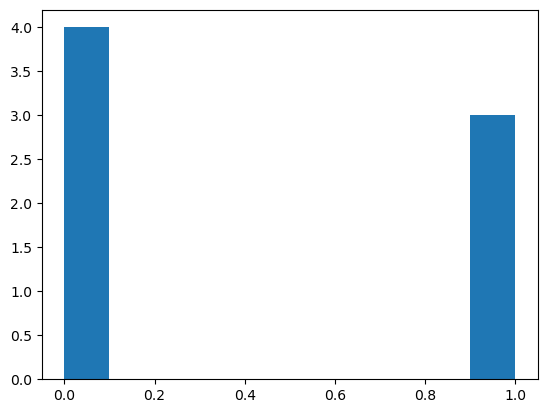

In [107]:
plt.hist([tup[1] for tup in DIN_state_array])

Text(0.5, 1.0, 'Din State Change against Timestamps')

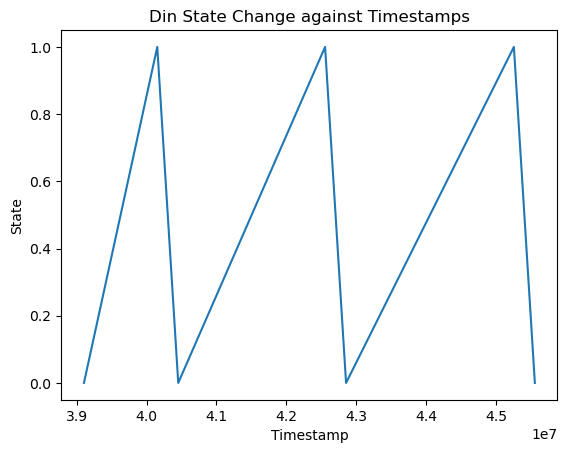

In [108]:
plt.plot([tup[0] for tup in DIN_state_array], [tup[1] for tup in DIN_state_array])
plt.xlabel("Timestamp")
plt.ylabel("State")
plt.title("Din State Change against Timestamps")

# From DIN to Video

- State 1 is when the MED-PC signal is being recieved. And 0 is when it is turned off. So we will get the timestamp of when it is first 1.

In [109]:
DIN_state_array

array([(39104773, 0), (40153288, 1), (40453274, 0), (42553166, 1),
       (42853151, 0), (45253029, 1), (45553013, 0)],
      dtype=[('time', '<u4'), ('state', 'u1')])

In [110]:
DIN_time_stamp = DIN_state_array[5][0]

In [111]:
DIN_time_stamp

45253029

- Array of the time stamp of all the frames

In [112]:
pos_timestamp_array

array([39104810, 39106160, 39107726, ..., 45870150, 45871601, 45872946])

- Getting the first video time stamp that is greater than the voltage time stamp

In [113]:
current_video_frame = timestamp_to_index(current_ts=DIN_time_stamp, ts_array=pos_timestamp_array)

In [114]:
current_video_frame

4092

## Getting the specific frame

In [115]:
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Frame count:', frame_count)

Frame count: 4504


- Original frame number(before light turns on)

In [116]:
corrected_video_frame = current_video_frame

- Corrected frame number(that has the light on)

In [117]:
corrected_video_frame = current_video_frame + 2

In [118]:
cap.set(cv2.CAP_PROP_POS_FRAMES, corrected_video_frame)


True

In [119]:
_, frame = cap.read()

In [120]:
video_file_path

'./data/mice_with_tethered_with_medpc_20220907_140232.rec/20220907_140232test.1.mp4'

In [121]:
output_directory = "./proc"

In [122]:
output_directory

'./proc'

In [123]:
os.makedirs(output_directory, exist_ok=True)

In [124]:
video_file_basename = os.path.basename(video_file_path)

In [125]:
video_file_root = os.path.splitext(video_file_basename)[0]

In [126]:
video_file_root

'20220907_140232test.1'

In [127]:
cv2.imwrite(os.path.join(output_directory, '{}.frame_{}.png'.format(video_file_root, corrected_video_frame)), frame)

True

- Where this video time stamp is(within the list of video time stamps), would be the frame number that corresponds to the ephys recording instance

In [128]:
current_video_seconds = corrected_video_frame / fps

In [129]:
current_video_seconds

303.1917665679889

In [130]:
print("MED-PC signal is at {}:{}".format(int(current_video_seconds // 60), int(current_video_seconds % 60)))

MED-PC signal is at 5:3


# Syncing up the timestamps using Pandas

In [135]:
voltage_timestamp_array[:5]

array([39104773, 39104774, 39104775, 39104776, 39104777])

In [134]:
voltage_timestamp_array.shape

(6768567,)

In [136]:
voltage_value_array[:5]

array([([-1084,  -723,  -380,  -972,  -469, -1199,  -671,  -491,   -24, -3433, -2578, -2087,  -239,   184,   814,  -516,  -970,  -770,   163,  -114,    37, -3377,  -560,   -84,  -411, -3802, -3509, -3242, -2075,  -365,  -525, -1193],),
       ([-1007,  -754,  -376, -1010,  -538, -1231,  -658,  -375,   -81, -3450, -2511, -2036,  -197,   184,   798,  -430, -1001,  -790,   114,   -18,    59, -3321,  -587,  -161,  -280, -3843, -3478, -3174, -2050,  -370,  -493, -1179],),
       ([ -986,  -687,  -381, -1062,  -506, -1231,  -644,  -403,   -30, -3431, -2575, -2068,  -128,   185,   773,  -430,  -970,  -781,   -12,   -72,    47, -3259,  -635,  -206,  -241, -3756, -3493, -3180, -2116,  -361,  -554, -1129],),
       ([-1003,  -719,  -381, -1107,  -400, -1260,  -647,  -404,    17, -3392, -2626, -2089,  -261,   211,   748,  -430,  -944,  -737,    13,  -109,    15, -3216,  -571,  -115,  -367, -3800, -3463, -3239, -2116,  -462,  -511, -1098],),
       ([-1051,  -729,  -381, -1105,  -447, -1273,  -632

In [133]:
voltage_value_array.shape

(6768567,)

In [139]:
import pandas as pd

In [145]:
ephys_dataframe = pd.DataFrame(voltage_timestamp_array, columns=["voltage_time_stamp"])

In [146]:
ephys_dataframe

,voltage_time_stamp
0,39104773
1,39104774
2,39104775
3,39104776
4,39104777
...,...
6768562,45873335
6768563,45873336
6768564,45873337
6768565,45873338


In [149]:
ephys_dataframe["voltage_value"] = voltage_value_array.tolist()

In [150]:
ephys_dataframe

,voltage_time_stamp,voltage_value
0,39104773,"([-1084, -723, -380, -972, -469, -1199, -671, ..."
1,39104774,"([-1007, -754, -376, -1010, -538, -1231, -658,..."
2,39104775,"([-986, -687, -381, -1062, -506, -1231, -644, ..."
3,39104776,"([-1003, -719, -381, -1107, -400, -1260, -647,..."
4,39104777,"([-1051, -729, -381, -1105, -447, -1273, -632,..."
...,...,...
6768562,45873335,"([1864, 3916, 3009, 748, 768, 1155, 612, 584, ..."
6768563,45873336,"([1986, 3960, 2965, 770, 710, 1196, 659, 649, ..."
6768564,45873337,"([2008, 3916, 3036, 753, 616, 1162, 759, 653, ..."
6768565,45873338,"([1981, 3942, 3086, 892, 644, 1098, 685, 616, ..."


In [151]:
video_time_stamp_dict["data"]

array([(39104810, 30742, 0), (39106160, 30743, 0), (39107726, 30744, 0),
       ..., (45870150, 35244, 0), (45871601, 35245, 0),
       (45872946, 35246, 0)],
      dtype=[('PosTimestamp', '<u4'), ('HWframeCount', '<u4'), ('HWTimestamp', '<u8')])

In [153]:
video_dataframe = pd.DataFrame(video_time_stamp_dict["data"])

In [169]:
video_dataframe.insert(0, 'frame_number', range(1, 1 + len(video_dataframe)))

In [170]:
video_dataframe

,frame_number,PosTimestamp,HWframeCount,HWTimestamp
0,1,39104810,30742,0
1,2,39106160,30743,0
2,3,39107726,30744,0
3,4,39108939,30745,0
4,5,39110620,30746,0
...,...,...,...,...
4500,4501,45866941,35242,0
4501,4502,45868124,35243,0
4502,4503,45870150,35244,0
4503,4504,45871601,35245,0


In [171]:
ephy_and_video_dataframe = pd.merge(ephys_dataframe, video_dataframe, left_on='voltage_time_stamp', right_on='PosTimestamp', how="left")

In [172]:
ephy_and_video_dataframe

,voltage_time_stamp,voltage_value,frame_number,PosTimestamp,HWframeCount,HWTimestamp
0,39104773,"([-1084, -723, -380, -972, -469, -1199, -671, ...",NaN,NaN,NaN,NaN
1,39104774,"([-1007, -754, -376, -1010, -538, -1231, -658,...",NaN,NaN,NaN,NaN
2,39104775,"([-986, -687, -381, -1062, -506, -1231, -644, ...",NaN,NaN,NaN,NaN
3,39104776,"([-1003, -719, -381, -1107, -400, -1260, -647,...",NaN,NaN,NaN,NaN
4,39104777,"([-1051, -729, -381, -1105, -447, -1273, -632,...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6768562,45873335,"([1864, 3916, 3009, 748, 768, 1155, 612, 584, ...",NaN,NaN,NaN,NaN
6768563,45873336,"([1986, 3960, 2965, 770, 710, 1196, 659, 649, ...",NaN,NaN,NaN,NaN
6768564,45873337,"([2008, 3916, 3036, 753, 616, 1162, 759, 653, ...",NaN,NaN,NaN,NaN
6768565,45873338,"([1981, 3942, 3086, 892, 644, 1098, 685, 616, ...",NaN,NaN,NaN,NaN


In [173]:
ephy_and_video_dataframe.columns

Index(['voltage_time_stamp', 'voltage_value', 'frame_number', 'PosTimestamp',
       'HWframeCount', 'HWTimestamp'],
      dtype='object')

In [174]:
ephy_and_video_dataframe.dropna(subset=["PosTimestamp"])

,voltage_time_stamp,voltage_value,frame_number,PosTimestamp,HWframeCount,HWTimestamp
37,39104810,"([-982, -785, -462, -1107, -304, -1220, -585, ...",1.0,39104810.0,30742.0,0.0
1387,39106160,"([-754, -661, -547, -846, -539, -1473, -761, -...",2.0,39106160.0,30743.0,0.0
2953,39107726,"([17, 198, 245, -157, 325, -65, 52, 264, 173, ...",3.0,39107726.0,30744.0,0.0
4166,39108939,"([275, 377, 527, 205, 458, 361, 298, 414, 432,...",4.0,39108939.0,30745.0,0.0
5847,39110620,"([-726, -1315, -1061, -1400, -1383, -756, -828...",5.0,39110620.0,30746.0,0.0
...,...,...,...,...,...,...
6762168,45866941,"([623, 835, 687, 563, 645, 625, 430, 644, 517,...",4501.0,45866941.0,35242.0,0.0
6763351,45868124,"([49, 51, 140, 392, 468, 398, 194, 497, 275, 8...",4502.0,45868124.0,35243.0,0.0
6765377,45870150,"([-230, 54, 88, 234, 137, 136, 138, 164, 50, 4...",4503.0,45870150.0,35244.0,0.0
6766828,45871601,"([73, 26, 266, 468, 357, 310, 458, 242, 536, 6...",4504.0,45871601.0,35245.0,0.0


In [165]:
ephy_and_video_dataframe[ephy_and_video_dataframe['PosTimeStamp'].notna()]

KeyError: 'PosTimeStamp'

# Syncing up the timestamps using Classes

## Extracting the data and the metadata from the Recording folder

- Creating a dictionary that has the directory as the key and a dictionary that has the file name as the key and the 

In [ ]:
raw_data_file_path

In [ ]:
raise ValueError()

In [ ]:
class TimestampSyncer():
    """
    """
    def __init__(self, recording_directory=None):
        """

        Args:
            param1 (str): Description of `param1`.
        """
        self.recording_directory = recording_directory
        if self.recording_directory is not None:
            self.file_to_data = trodes.read_exported.get_all_trodes_data_from_directory(parent_directory_path=self.recording_directory)
        else:
            self.file_to_data = None
        self.current_time_stamp = 1
        self.voltage_timestamp_array = None
        self.video_timestamp_array = None
        
    def get_voltage_timestamp_array(self, directory_substring="raw", file_substring="timestamps.dat"):
        """TODO: Add docstring

        Args:
            directory_substring: The first parameter.
            file_substring: The second parameter.

        Returns:
            Numpy array of the timestamps of the voltage recordings
        """
        directory_key = trodes.read_exported.get_key_with_substring(self.file_to_data, substring=directory_substring, return_first=True)
        file_key = trodes.read_exported.get_key_with_substring(self.file_to_data[directory_key], substring=file_substring, return_first=True)
        self.voltage_timestamp_array = self.file_to_data[directory_key][file_key]["data"]
        return self.voltage_timestamp_array
    
    def get_video_timestamp_array(self, directory_substring=".", file_substring="videoTimeStamps"):
        """TODO: Add docstring

        Args:
            directory_substring: The first parameter.
            file_substring: The second parameter.

        Returns:
            Numpy array of the timestamps of the voltage recordings
        """
        directory_key = trodes.read_exported.get_key_with_substring(self.file_to_data, substring=directory_substring, return_first=True)
        file_key = trodes.read_exported.get_key_with_substring(self.file_to_data[directory_key], substring=file_substring, return_first=True)
        self.video_timestamp_array = self.file_to_data[directory_key][file_key]["data"]
        return self.video_timestamp_array    
    
    def convert_voltage_index_to_timestamp(self):
        """
        """
        pass
    
    def convert_timestamp_to_voltage_index(self):
        """
        """
        pass

# TODO: Use exact match if there is one

TODO: Or use the keys from the file extention

# TODO: Strip period or keep if it's just a period

In [ ]:
example_timestamp_syncer = TimestampSyncer(recording_directory=raw_data_file_path)

In [ ]:
example_timestamp_syncer.file_to_data.keys()

In [ ]:
example_timestamp_syncer.file_to_data["."].keys()

In [ ]:
trodes.read_exported.get_key_with_substring(example_timestamp_syncer.file_to_data, substring=".")

In [ ]:
example_timestamp_syncer.file_to_data["20220907_140232test.raw"]

In [ ]:
example_timestamp_syncer.get_voltage_timestamp_array()

In [ ]:
example_timestamp_syncer.voltage_timestamp_array

In [ ]:
example_timestamp_syncer.voltage_timestamp_array[0]

In [ ]:
example_timestamp_syncer.get_video_timestamp_array()

In [ ]:
class ExampleClass(object):
    """The summary line for a class docstring should fit on one line.

    If the class has public attributes, they may be documented here
    in an ``Attributes`` section and follow the same formatting as a
    function's ``Args`` section. Alternatively, attributes may be documented
    inline with the attribute's declaration (see __init__ method below).

    Properties created with the ``@property`` decorator should be documented
    in the property's getter method.

    Attributes:
        attr1 (str): Description of `attr1`.
        attr2 (:obj:`int`, optional): Description of `attr2`.

    """

    def __init__(self, param1, param2, param3):
        """Example of docstring on the __init__ method.

        The __init__ method may be documented in either the class level
        docstring, or as a docstring on the __init__ method itself.

        Either form is acceptable, but the two should not be mixed. Choose one
        convention to document the __init__ method and be consistent with it.

        Note:
            Do not include the `self` parameter in the ``Args`` section.

        Args:
            param1 (str): Description of `param1`.
            param2 (:obj:`int`, optional): Description of `param2`. Multiple
                lines are supported.
            param3 (:obj:`list` of :obj:`str`): Description of `param3`.

        """
        self.attr1 = param1
        self.attr2 = param2
        self.attr3 = param3  #: Doc comment *inline* with attribute

        #: list of str: Doc comment *before* attribute, with type specified
        self.attr4 = ['attr4']

        self.attr5 = None
        """str: Docstring *after* attribute, with type specified."""

    @property
    def readonly_property(self):
        """str: Properties should be documented in their getter method."""
        return 'readonly_property'

    @property
    def readwrite_property(self):
        """:obj:`list` of :obj:`str`: Properties with both a getter and setter
        should only be documented in their getter method.

        If the setter method contains notable behavior, it should be
        mentioned here.
        """
        return ['readwrite_property']

    @readwrite_property.setter
    def readwrite_property(self, value):
        value

    def example_method(self, param1, param2):
        """Class methods are similar to regular functions.

        Note:
            Do not include the `self` parameter in the ``Args`` section.

        Args:
            param1: The first parameter.
            param2: The second parameter.

        Returns:
            True if successful, False otherwise.

        """
        return True

    def __special__(self):
        """By default special members with docstrings are not included.

        Special members are any methods or attributes that start with and
        end with a double underscore. Any special member with a docstring
        will be included in the output, if
        ``napoleon_include_special_with_doc`` is set to True.

        This behavior can be enabled by changing the following setting in
        Sphinx's conf.py::

            napoleon_include_special_with_doc = True

        """
        pass

    def __special_without_docstring__(self):
        pass

    def _private(self):
        """By default private members are not included.

        Private members are any methods or attributes that start with an
        underscore and are *not* special. By default they are not included
        in the output.

        This behavior can be changed such that private members *are* included
        by changing the following setting in Sphinx's conf.py::

            napoleon_include_private_with_doc = True

        """
        pass

    def _private_without_docstring(self):
        pass

In [ ]:
raise ValueError("Below is for spikesorting which takes long if ran fully. Skip over to other section if needed")

# Spike sorting

In [ ]:
import os
from collections import defaultdict
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import pandas as pd
import glob
from pathlib import Path


In [ ]:
%matplotlib inline


# Getting started tutorial

In this introductory example, you will see how to use the :code:`spikeinterface` to perform a full electrophysiology analysis.
We will first create some simulated data, and we will then perform some pre-processing, run a couple of spike sorting
algorithms, inspect and validate the results, export to Phy, and compare spike sorters.


# TODO: 
- Try to label each unit id with the same color across plots

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

The spikeinterface module by itself import only the spikeinterface.core submodule
which is not useful for end user



In [ ]:
import spikeinterface

We need to import one by one different submodules separately (preferred).
There are 5 modules:

- :code:`extractors` : file IO
- :code:`toolkit` : processing toolkit for pre-, post-processing, validation, and automatic curation
- :code:`sorters` : Python wrappers of spike sorters
- :code:`comparison` : comparison of spike sorting output
- :code:`widgets` : visualization



In [ ]:
import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw

In [ ]:
import spikeinterface.core

We can also import all submodules at once with this
  this internally import core+extractors+toolkit+sorters+comparison+widgets+exporters

This is useful for notebooks but this is a more heavy import because internally many more dependency
are imported (scipy/sklearn/networkx/matplotlib/h5py...)



In [ ]:
import spikeinterface.full as si

In [ ]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (10,6)

# Part 0: Imorting Processes Recording and Spike Sorting Data from Previous Notebook

## Loading in the Preprocessed Electrophysiology Recording

- We are inputting the electrophsiology recording data with probe information. This should have been created in the prevous notebook in a directory created by Spike Interface. If you had already read in your own electrophsiology recording data with probe information with a different way, then follow these instructions.
    - If you want to use a different directory, then you must either:
        - Change `glob.glob({./path/to/with/*/preprocessing})` to the directory that you have the directories created from Spikeinterface. You can use a wildcard if you have multiple folders. You would replace `{./path/to/with/*/preprocessing}` with the path to either the parent directory or the actual directory containing the electrophsiology recording data read into Spikeinterface.
        - Or change `(file_or_folder_or_dict={./path/to/preprocessing})`. You would replace `{./path/to/preprocessing}` with the path to either the parent directory or the actual directory containing the electrophsiology recording data read into Spikeinterface.

In [ ]:
all_recording_preprocessing_directories = glob.glob("./proc/*/preprocessing", recursive=True)

In [ ]:
all_recording_preprocessing_directories = sorted(all_recording_preprocessing_directories)

In [ ]:
all_recording_preprocessing_directories

- If you have more than one recording directory, then you must either:
    - A. Put the index of the file in `all_recording_directories[0]` below. You would replace the `0` with the correct index. (Remember, Python is zero indexed so the first file in the list is 0. Second is 1, and so forth.
    - B. Add a absolute or relative path to `(file_or_folder_or_dict={./path/to/recording_file.rec}`) below. You would replace `{./path/to/recording_file.rec}` with the path of the file for the metadata.

In [ ]:
# To be used for all steps
recording_preprocessed = spikeinterface.core.load_extractor(file_or_folder_or_dict=all_recording_preprocessing_directories[0])

In [ ]:
type(recording_preprocessed)

## Metadata from the recording file

- This is how you retrieve info from a :code:`RecordingExtractor`...


In [ ]:
channel_ids = recording_preprocessed.get_channel_ids()
fs = recording_preprocessed.get_sampling_frequency()
num_chan = recording_preprocessed.get_num_channels()
num_seg = recording_preprocessed.get_num_segments()
duration = recording_preprocessed.get_num_frames()

print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)
print('Duration:', duration)
print('Number of hours:', duration/fs/3600)

- Looking over the recording file

In [ ]:
sw.plot_timeseries(recording_preprocessed, show_channel_ids=True)
plt.title("Timeseries for Traces for Preprocessed Recording")
plt.ylabel("Channels")

In [ ]:
channel_ids = np.random.choice(recording_preprocessed.channel_ids, size=5, replace=False)

In [ ]:
channel_ids = sorted(channel_ids, key=lambda x: float(x))

In [ ]:

sw.plot_timeseries(recording_preprocessed, channel_ids=channel_ids, show_channel_ids=True)
plt.title("Timeseries for Traces for Preprocessed Recording")
plt.ylabel("Channels")

- Importing the Spike Sorting Output

In [ ]:
all_spikesorting_directories = glob.glob("./proc/**/ss_output", recursive=True)

In [ ]:
all_spikesorting_directories = sorted(all_spikesorting_directories)

In [ ]:
all_spikesorting_directories

- If you have more than one recording directory, then you must either:
    - A. Put the index of the file in `all_spikesorting_directories[0]` below. You would replace the `0` with the correct index. (Remember, Python is zero indexed so the first file in the list is 0. Second is 1, and so forth.
    - B. Add a absolute or relative path to `ss.read_sorter_folder({./path/to/spikesorting_directory}`) below. You would replace `{./path/to/spikesorting_directory}` with the path of the file for the spike sorting output directory.

In [ ]:
spike_sorted_object = ss.read_sorter_folder(all_spikesorting_directories[0])

In [ ]:
type(spike_sorted_object)

# Part 1: Post Processing

- Different resources to look at for Post Processing
    - https://spikeinterface.readthedocs.io/en/latest/modules/toolkit/plot_2_postprocessing.html
    - https://github.com/SpikeInterface/spiketutorials/blob/master/Official_Tutorial_SI_0.90_Aug2021/SpikeInterface_Tutorial.ipynb
    - https://spikeinterface.readthedocs.io/en/latest/modules/toolkit/plot_3_quality_mertics.html
    - https://catalystneuro.github.io/spike-sorting-hackathon/

## Creating a folder for Spike Sorting Output

In [ ]:
child_spikesorting_output_directory = Path(all_spikesorting_directories[0])
parent_spikesorting_output_directory = child_spikesorting_output_directory.parent.absolute()

In [ ]:
parent_spikesorting_output_directory

- Creating a directory within the spike sorting directory for saving extracted waveforms 

In [ ]:
waveform_output_directory = os.path.join(parent_spikesorting_output_directory, "waveforms")

In [ ]:
waveform_output_directory

## Extracting Waveforms

In [ ]:
from spikeinterface import WaveformExtractor, extract_waveforms
import spikeinterface.extractors as se

- The WaveformExtractor class:
    - randomly samples a subset spikes with max_spikes_per_unit
    - extracts all waveforms snippets for each unit
    - saves waveforms in a local folder
    - can load stored waveforms
    - retrieves template (average or median waveform) for each unit
    - https://spikeinterface.readthedocs.io/en/latest/modules/core/plot_4_waveform_extractor.html



- Extracting waveforms from preprocessed recordings and spike sorted output from spike_sorted 
    - Based on Maya's settings in recorded video 
    - Saving to folder

In [ ]:
we_spike_sorted = si.extract_waveforms(recording=recording_preprocessed, 
                                       sorting=spike_sorted_object, folder=waveform_output_directory,
                                      ms_before=1, ms_after=1, progress_bar=True,
                                      n_jobs=8, total_memory="1G", overwrite=True,
                                       max_spikes_per_unit=2000)

- Loading from folder

In [ ]:
we_spike_sorted = WaveformExtractor.load_from_folder(waveform_output_directory)

- Make into code cell if you want to look at details of waveform extraction

## Signal to Noise Ratio of Each Unit

- Calculating Signal to Noise Ratio

In [ ]:
we_spike_sorted.get_template(unit_id=2).shape

In [ ]:
we_spike_sorted_signal_to_noise = st.compute_snrs(we_spike_sorted).values()

In [ ]:
we_spike_sorted_signal_to_noise

In [ ]:
len(we_spike_sorted_signal_to_noise)

- Filtering the Units that have higher signal to noise ratios
    - **NOTE**: If the histogram does not show enough information, either raise or lower the number of bins

In [ ]:
plt.hist(we_spike_sorted_signal_to_noise, bins=23)

- Creating a mask based on whether the SNR ratio is higher than what we specified
    - **NOTE**: Change the minimum signal to noise ratio based on the number of units that you want

In [ ]:
mask = np.array(list(we_spike_sorted_signal_to_noise)) > 4

In [ ]:
mask

In [ ]:
spike_sorted_object.get_unit_ids()

- We will get a list of all the Unit IDs that have higher SNR ratios based on the indexes of these units in the mask

In [ ]:
high_snr_units = spike_sorted_object.get_unit_ids()[mask]

In [ ]:
high_snr_units

In [ ]:
len(spike_sorted_object.get_unit_ids()[mask])

## Plotting the Waveforms for a single unit

- Each column represents a single channel
    - We are plotting the units with the highest signal to noise ratio
    - **NOTE**: Channels can be zero indexed, so the first channel will be numbered zero. Second will be one. And so on

In [ ]:
we_spike_sorted

- TODO: Change X ticks so that they correspond to channel ID's

In [ ]:
for unit_id in high_snr_units:
    w = sw.plot_unit_waveforms(we_spike_sorted, unit_ids=[unit_id], plot_templates=True, plot_channels=True)

In [ ]:
for unit_id in high_snr_units:
    w = sw.plot_unit_templates(we_spike_sorted, unit_ids=[unit_id])



In [ ]:
w = sw.plot_unit_probe_map(we_spike_sorted, unit_ids=[1])


## Plotting the Waveforms for a single channel

- Plotting the Average Waveforms (AKA Unit templates)

In [ ]:
for index, channel in enumerate(recording_preprocessed.get_channel_ids()):
    number_of_units_to_plot = len(high_snr_units)
    colors = iter(cm.rainbow(np.linspace(0, 1, number_of_units_to_plot)))

    fig, ax = plt.subplots()
    for i, unit_id in enumerate(high_snr_units[:number_of_units_to_plot]):
        template = we_spike_sorted.get_template(unit_id)
        color = next(colors)
        ax.plot(template[:, index].T, color=color, lw=3, label=unit_id)
    ax.legend()
    ax.set_title("Average waveforms for channel: {}".format(channel))
    plt.show()
    plt.close()

- Plotting the Unit Summary for the high snr units

In [ ]:
for index, unit_id in enumerate(high_snr_units):
    w = sw.plot_unit_summary(we_spike_sorted, unit_id=unit_id)
    plt.show()
    plt.close()

- Plotting the Unit Summary for the low snr units

In [ ]:
for index, unit_id in enumerate(spike_sorted_object.get_unit_ids()[~mask]):
    w = sw.plot_unit_summary(we_spike_sorted, unit_id=unit_id)
    plt.show()
    plt.close()

- Waveform and Template Shapes
    - For waveforms, the dimension is (num_spikes, num_samples, num_channels), while each template has dimension (num_samples, num_channels). 

In [ ]:
unit_id = high_snr_units[0]

waveforms = we_spike_sorted.get_waveforms(unit_id=unit_id)
print(f"Waveforms shape: {waveforms.shape}")
template = we_spike_sorted.get_template(unit_id=unit_id)
print(f"Template shape: {template.shape}")
all_templates = we_spike_sorted.get_all_templates()
print(f"All templates shape: {all_templates.shape}")



- The number of spikes for other waveforms
    - All are num waveforms are maxed out because we specied with the Waveform Extractor

In [ ]:
unit_to_waveform_and_spike_number = defaultdict(dict)
for unit in spike_sorted_object.get_unit_ids():
    waveforms = we_spike_sorted.get_waveforms(unit_id=unit)
    spiketrain = spike_sorted_object.get_unit_spike_train(unit)
#     print(f"Unit {unit} - num waveforms: {waveforms.shape[0]} - num spikes: {len(spiketrain)}")
    unit_to_waveform_and_spike_number[unit]["number_of_waveforms"] = waveforms.shape[0]
    unit_to_waveform_and_spike_number[unit]["number_of_spikes"] = len(spiketrain)


In [ ]:
unit_to_waveform_and_spike_number

# PCA Scores

PCA scores can be easily computed with the `compute_principal_components()` function. Similarly to the `extract_waveforms`, the function returns an object of type `WaveformPrincipalComponent` that allows to retrieve all pc scores on demand.

### Getting the Principal Components

- Calculating Principal Components
    - We will first be using the local channel option

In [ ]:
pc = st.compute_principal_components(we_spike_sorted, load_if_exists=True,
                                     n_components=3, mode='by_channel_local')


In [ ]:
len(spike_sorted_object.get_unit_ids())

In [ ]:
spike_sorted_object.get_unit_ids()[0]

- For pc scores of a single unit, the dimension is (num_spikes, num_components, num_channels). The get_all_components() function returns an array with the label/unit id for each component (all_labels) and an array of dimension (num_all_samples, num_components, num_channels).

In [ ]:
pc1 = pc.get_components(unit_id=1)
print(f"PC scores shape: {pc1.shape}")
all_labels, all_pcs = pc.get_all_components()
print(f"All PC scores shape: {all_pcs.shape}")



- Plotting the PCA for units with high SNR for each channel
    - **NOTE**: If you see distinct clusters in the PCA plots. Then you will likely see a distinct spike for that unit in the same channel in the average waveforms plots. 

In [ ]:
for channel_id in recording_preprocessed.get_channel_ids():
    fig, ax = plt.subplots()
    n = len(high_snr_units) + 1
    colors = iter(cm.rainbow(np.linspace(0, 1, n)))
    for i, unit_id in enumerate(high_snr_units):
        comp = pc.get_components(unit_id)
        color = next(colors)
        ax.scatter(comp[:, 0, int(channel_id)], comp[:, 1, int(channel_id)], color=color, label=unit_id)
    ax.set_title("PCA for channel: {}".format(channel_id))
    plt.legend()
    plt.show()
    plt.close()

# Compute template metrics

- Template metrics, or extracellular features, such as peak to valley duration or full-width half maximum, are important to classify neurons into putative classes (excitatory - inhibitory). The `toolkit` allows one to compute several of these metrics:

In [ ]:
template_metrics = st.calculate_template_metrics(we_spike_sorted, peak_sign="neg")

In [ ]:
template_metrics


# Validation and Curation with Quality Metrics

Quality metrics for the spike sorting output are very important to asses the spike sorting performance.
The :code:`spikeinterface.toolkit.qualitymetrics` module implements several quality metrics
to assess the goodness of sorted units. Among those, for example,
are signal-to-noise ratio, ISI violation ratio, isolation distance, and many more.
Theses metrics are built on top of WaveformExtractor class and return a dictionary with the unit ids as keys:



In [ ]:
isi_violations_rate, isi_violations_count = st.compute_isi_violations(we_spike_sorted, isi_threshold_ms=1.5)

In [ ]:
print("ISI Violation Rate: {}".format(isi_violations_rate))


In [ ]:
plt.hist(isi_violations_rate.values())

In [ ]:
print("ISI Violation Count: {}".format(isi_violations_count))


In [ ]:
plt.hist(isi_violations_count.values())

All theses quality metrics can be computed in one shot and returned as
a :code:`pandas.Dataframe`



In [ ]:
metrics = st.compute_quality_metrics(we_spike_sorted, waveform_principal_component=pc)

- Each row is a Unit

In [ ]:
metrics

Quality metrics can be also used to automatically curate the spike sorting
output. For example, you can select sorted units with a SNR above a
certain threshold:



In [ ]:
snr_thresh = 5
isi_viol_thresh = 0.2

In [ ]:
our_query = f"snr > {snr_thresh} & isi_violations_rate < {isi_viol_thresh}"
print(our_query)

In [ ]:
keep_units = metrics.query(our_query)
keep_unit_ids = keep_units.index.values

In [ ]:
sorting_auto = spike_sorted_object.select_units(keep_unit_ids)
print(f"Number of units before curation: {len(spike_sorted_object.get_unit_ids())}")
print(f"Number of units after curation: {len(sorting_auto.get_unit_ids())}")

# Plotting Channels with Multiple Units

## Compute unit maximum channel¶

- For each unit, calculating the channel with the highest the most extreme signal

In [ ]:
extremum_channels_ids = st.get_template_extremum_channel(we_spike_sorted, peak_sign='neg')
print(extremum_channels_ids)

In [ ]:
extremum_channels_ids = st.get_template_extremum_channel(we_spike_sorted, peak_sign='pos')
print(extremum_channels_ids)

- Getting the channel that's the top channel for multiple units

In [ ]:
channel_to_units = defaultdict(dict)
for k, v in extremum_channels_ids.items():
    channel_to_units[v] = channel_to_units.get(v, []) + [k]

In [ ]:
channel_to_units

In [ ]:
channel_to_multiple_units = {k:v for k, v in channel_to_units.items() if len(v) >=2}

In [ ]:
channel_to_multiple_units

- PCA Plots

In [ ]:
for channel, multiple_units in channel_to_multiple_units.items():

    n = len(multiple_units) + 1
    colors = iter(cm.rainbow(np.linspace(0, 1, n)))

    fig, ax = plt.subplots()
    for i, unit_id in enumerate(multiple_units):
        comp = pc.get_components(unit_id)
#         print(comp.shape)
        color = next(colors)
        ax.scatter(comp[:, 0, int(channel)], comp[:, 1, int(channel)], color=color, label=unit_id)
    ax.legend()
#     print(channel)
    ax.set_title("PCA Plot for Channel: {}".format(str(channel)))
    plt.show()
    plt.close()

# Looking over the waveforms for the different unit groups

In [ ]:
for channel, multiple_units in channel_to_multiple_units.items():
    print("Channel: {}".format(channel))
    for unit in multiple_units:
        print("Unit: {}".format(unit))
        sw.plot_unit_templates(we_spike_sorted, channel_ids=recording_preprocessed.channel_ids, unit_ids=[unit], plot_templates=True, plot_channels=True)
        plt.show()
        plt.close()

In [ ]:
for channel, multiple_units in channel_to_multiple_units.items():
    print("Channel: {}".format(channel))
    for unit in multiple_units:
        print("Unit: {}".format(unit))
        w = sw.plot_unit_summary(we_spike_sorted, unit_id=unit)
        plt.show()
        plt.close()

# Exporting for Manual Curation

Once we have the  `WaveformExtractor` object
we can post-process, validate, and curate the results. With
the :code:`toolkit.postprocessing` submodule, one can, for example,
get waveforms, templates, maximum channels, PCA scores, or export the data
to Phy. `Phy <https://github.com/cortex-lab/phy>`_ is a GUI for manual
curation of the spike sorting output. To export to phy you can run:



In [ ]:
from spikeinterface.exporters import export_to_phy



In [ ]:
phy_output_directory = os.path.join(parent_spikesorting_output_directory, "phy")

In [ ]:
phy_output_directory

## **Then you can run the template-gui with: `phy template-gui phy/params.py`
and manually curate the results.**



# Syncing the Spikesorting with the Timestamps

- Looking over the Spike Sorting Object

In [ ]:
spike_sorted_object

In [ ]:
spike_sorting_dict = spike_sorted_object.to_dict()

In [ ]:
spike_sorting_dict

- Looking at the output file of Spike sorting

In [ ]:
spike_sorting_array = np.load(spike_sorting_dict["kwargs"]["file_path"])

In [91]:
for index in spike_sorting_array:
    print(index)

NameError: name 'spike_sorting_array' is not defined

In [ ]:
spike_sorting_array["unit_ids"]

In [ ]:
spike_sorting_array["num_segment"]

In [ ]:
spike_sorting_array["sampling_frequency"]

In [ ]:
spike_sorted_object.frame_slice(start_frame=0, end_frame=10)

In [ ]:
spike_sorted_object

In [ ]:
spike_sorted_object.ids_to_indices(ids=[1,2])

In [ ]:
spike_sorted_object.get_unit_spike_train(unit_id=1)

In [ ]:
spike_sorted_object.get_unit_spike_train(unit_id=1).shape

In [ ]:
for unit_id in spike_sorted_object.get_unit_ids():
    print("Unit ID: {}".format(unit_id))
    spike_train = spike_sorted_object.get_unit_spike_train(unit_id=unit_id)
    print(spike_train[0], spike_train[-1] )

In [ ]:
spike_sorted_object

In [ ]:
spike_sorting_array["unit_ids"]

In [ ]:
spike_sorting_array["num_segment"]

- Indexes of all the spikes

In [ ]:
spike_sorted_object.ids_to_indices(ids=[1])

In [ ]:
spike_indexes = spike_sorting_array["spike_indexes_seg0"]

In [92]:
spike_indexes

NameError: name 'spike_indexes' is not defined

In [ ]:
spike_indexes.shape

In [ ]:
spike_labels = spike_sorting_array["spike_labels_seg0"]

In [ ]:
spike_labels

In [ ]:
spike_labels.shape

In [ ]:
sampling_frequency = spike_sorting_array["sampling_frequency"]

In [93]:
sampling_frequency

NameError: name 'sampling_frequency' is not defined

- Checking if the spike sorting timestamps correspond to those of the ephys recording timestamps

- Spike Index timestamps

In [ ]:
spike_indexes[-1]

In [ ]:
spike_indexes[-1] / sampling_frequency[0]

- Voltage Timestamp Array
    - Start vs Ending timestamp

In [ ]:
voltage_timestamp_array[0]

In [94]:
voltage_timestamp_array[-1]

45873339

In [95]:
voltage_timestamp_range = voltage_timestamp_array[-1] - voltage_timestamp_array[0]

In [96]:
voltage_timestamp_range / sampling_frequency[0]

NameError: name 'sampling_frequency' is not defined

- Comparison between spike and voltage timestamps

In [ ]:
voltage_timestamp_range - spike_indexes[-1]

## Converting the indexes of the spikes to timestamps

- Timestamp where the spike happened(first and last)

In [ ]:
voltage_timestamp_array[spike_indexes[0]]

In [ ]:
voltage_timestamp_array[spike_indexes[-1]]

## Looking at the tone time

In [ ]:
channel_ids = np.random.choice(recording_preprocessed.channel_ids, size=5, replace=False)

In [ ]:
channel_ids = sorted(channel_ids, key=lambda x: float(x))

In [ ]:
channel_ids

In [ ]:
DIN_state_array

In [ ]:
(DIN_state_array[2][0] - DIN_state_array[1][0]) / sampling_frequency[0]

In [ ]:
(DIN_state_array[4][0] - DIN_state_array[3][0]) / sampling_frequency[0]

In [ ]:
sampling_frequency[0]

In [ ]:
voltage_timestamp_array[1]

In [ ]:
tone_1_time_stamp = (DIN_state_array[3][0] -  voltage_timestamp_array[1]) / sampling_frequency[0]

In [ ]:
tone_1_time_stamp

In [ ]:
sw.plot_timeseries(recording_preprocessed, time_range=(tone_1_time_stamp-5, tone_1_time_stamp+5), channel_ids=channel_ids, show_channel_ids=True)
plt.title("Timeseries for Traces".format(key))
plt.ylabel("Channels")
plt.show()

# Supplementary Visualization and Quality Metrics

In [97]:
raise ValueError("Cells below are other options for visualizations and quality metrics. They take time and are still being tested, so running the rest of the notebook is not necessary. They are for those that want to look further into the recording data and the the postprocessing steps.")

ValueError: Cells below are other options for visualizations and quality metrics. They take time and are still being tested, so running the rest of the notebook is not necessary. They are for those that want to look further into the recording data and the the postprocessing steps.

## Spike Amplitudes

- Spike amplitudes can be computed with the `get_spike_amplitudes` function.


In [ ]:
amplitudes = st.get_spike_amplitudes(we_spike_sorted, outputs="concatenated", progress_bar=True)

In [ ]:
amplitudes[0].shape

In [98]:
sw.plot_amplitudes_distribution(we_spike_sorted, unit_ids=high_snr_units)

NameError: name 'sw' is not defined

In [ ]:
sw.plot_amplitudes_timeseries(we_spike_sorted, unit_ids=high_snr_units[:1])

By default, all amplitudes are concatenated in one array.

The correspinding spike times and labels can be easily retrieved as:

In [ ]:
all_spike_times, all_spike_labels = spike_sorted_object.get_all_spike_trains()[0]


- The [0] index is to select the first segment. In case of multiple segments each element will correspond to a different segment and will contain spike times and labels for that segment.


## ISI Violations

- https://github.com/SpikeInterface/spikeinterface/blob/master/spikeinterface/toolkit/qualitymetrics/misc_metrics.py
- https://numpy.org/doc/stable/reference/generated/numpy.diff.html

- The code that's used for the ISI Calcuations which suggest that only the differences between neighbors are being calculated

In [99]:

# all units converted to seconds
for unit_id in unit_ids:
    num_violations = 0
    num_spikes = 0
    for segment_index in range(num_segs):
        spike_train = sorting.get_unit_spike_train(unit_id=unit_id, segment_index=segment_index)
        isis = np.diff(spike_train)
        num_spikes += len(spike_train)
        num_violations += np.sum(isis < isi_threshold_samples)
    violation_time = 2 * num_spikes * (isi_threshold_s - min_isi_s)

NameError: name 'unit_ids' is not defined

- TODO: Install pyarrow

In [100]:
spike_sorted_quality_metrics_df

NameError: name 'spike_sorted_quality_metrics_df' is not defined

## Filtering based on metrics

- Focusing on:
    - snr, isi_violations_rate, isolation_distance

In [ ]:
good_units = spike_sorted_quality_metrics_df[(spike_sorted_quality_metrics_df["snr"] >= 4) & (spike_sorted_quality_metrics_df["isi_violations_rate"] < 0.01)]

In [ ]:
adequate_units = spike_sorted_quality_metrics_df[(spike_sorted_quality_metrics_df["snr"] >= 4) & (spike_sorted_quality_metrics_df["isi_violations_rate"] < 0.05) & (spike_sorted_quality_metrics_df["isi_violations_rate"] > 0.01)]

In [101]:
good_units

NameError: name 'good_units' is not defined

In [ ]:
adequate_units

- Looking over the unit summaries of units that match our criteria

In [ ]:
for index, unit in good_units.iterrows():
    w = sw.plot_unit_summary(we_spike_sorted, unit_id=index)

## 3D Plots for PCA

In [102]:
from mpl_toolkits import mplot3d

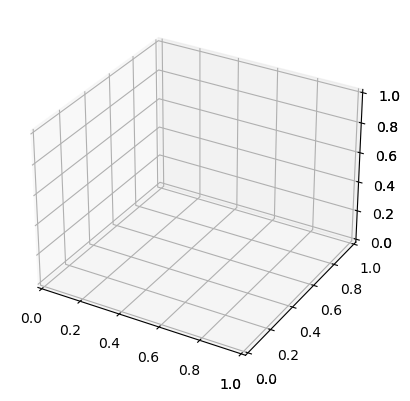

In [103]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

In [104]:
for channel, multiple_units in channel_to_multiple_units.items():

    n = len(multiple_units) + 1
    colors = iter(cm.rainbow(np.linspace(0, 1, n)))

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i, unit_id in enumerate(multiple_units):
        comp = pc.get_components(unit_id)
#         print(comp.shape)
        color = next(colors)
#         ax.scatter(comp[:, 0, 8], comp[:, 1, 8], color=color, label=unit_id)
        ax.scatter3D(comp[:, 0, int(channel)], comp[:, 1, int(channel)], comp[:, 2, int(channel)], c=color, cmap='Greens', label=unit_id);
        
    # make simple, bare axis lines through space:
    xAxisLine = ((min(comp[:, 0, int(channel)]), max(comp[:, 0, int(channel)])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(comp[:, 1, int(channel)]), max(comp[:, 1, int(channel)])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(comp[:, 2, int(channel)]), max(comp[:, 2, int(channel)])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    
    ax.legend()
#     print(channel)
    ax.set_title("PCA Plot for Channel: {}".format(str(channel)))
    plt.show()
    plt.close()

NameError: name 'channel_to_multiple_units' is not defined